In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read the dataset
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
# EDA
# let's try to find out nature
# if there is a linear reln between height and weight or not

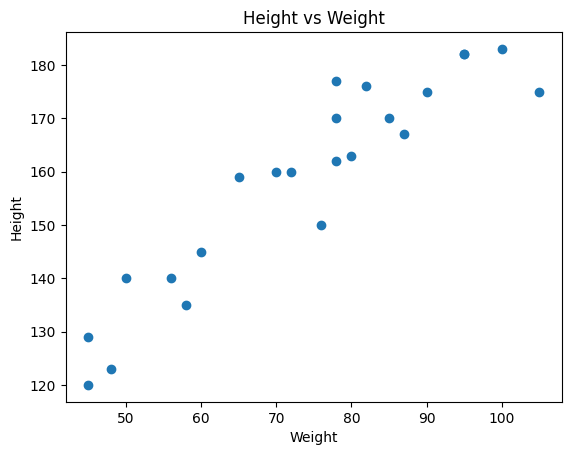

In [6]:
plt.scatter(df.Weight, df.Height)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

In [7]:
# it look's like a linear relationship
# as weight is increasing, height is also increasing

In [8]:
# Problem Statement >> I want to predict height based on weight

In [9]:
# Simple linear regression

In [ ]:
# Divide into X and y

In [10]:
X = df[['Weight']]
y = df['Height']

In [11]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [12]:
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [14]:
# Read the data
# EDA
# Data PReparation
# X and y
# Train Test Split
# Scaling
# Model Training
# Model Evaluation

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [18]:
X_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [19]:
X_test

,Weight
20,45
17,65
3,60
13,100
19,87
16,50


In [20]:
y_train

,Height
10,176
4,160
2,123
18,150
6,163
7,175
1,135
14,170
0,120
15,177


In [21]:
y_test

,Height
20,129
17,159
3,145
13,183
19,167
16,140


In [22]:
# Scaling

In [23]:
X_train.shape

(17, 1)

In [25]:
X_test.shape

(6, 1)

In [26]:
y_train.shape

(17,)

In [27]:
y_test.shape

(6,)

In [31]:
# Scaling(Optional)
# Standarisation >> it uses concept of normal distribution
# fit_transform on train date
# transform on test data
# if you use fit on test data, (that is wrong) you are doing data leakage, avoid it
# most of the ml models standard scler is used as normally distributed

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaler

StandardScaler()

In [35]:
X_train

,Weight
10,82
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78


In [36]:
# scaling should be done always after train_test_split
# target variable cannot be done
# avoid scaling categorical features
X_train = scaler.fit_transform(X_train) # for train data use fit_transform

In [38]:
X_test = scaler.transform(X_test) # for test data use transform

In [39]:
X_train

array([[ 0.37554243],
       [-0.36825034],
       [-1.73187043],
       [ 0.00364604],
       [ 0.25157697],
       [ 0.87140428],
       [-1.11204312],
       [ 0.56149062],
       [-1.91781863],
       [ 0.12761151],
       [-0.24428488],
       [-1.23600858],
       [ 0.12761151],
       [ 1.18131794],
       [ 1.80114525],
       [ 1.18131794],
       [ 0.12761151]])

In [40]:
X_test

array([[-1.91781863],
       [-0.678164  ],
       [-0.98807766],
       [ 1.49123159],
       [ 0.68545609],
       [-1.60790497]])

In [41]:
# scaling is optional
# because it does not affect the distribution of the data

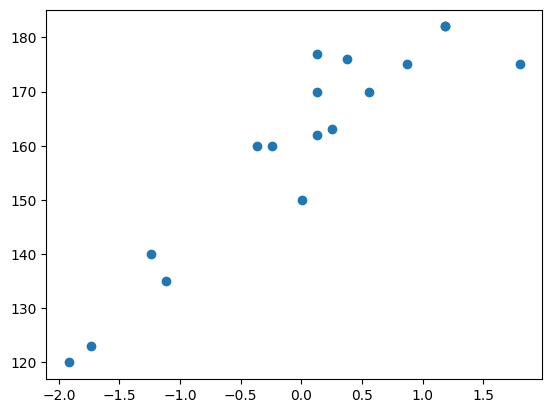

In [42]:
plt.scatter(X_train, y_train)

In [43]:
# this looks similarly like same as above

In [44]:
# model traning
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model

LinearRegression()

In [47]:
# linear regression parameter
# fit_intercept >> the best fit line will have intercept, by default it is true

In [48]:
# copy_X >> copy the original X_train then build the model
# it will not actually modify the original data

In [49]:
# n_jobs >> you want to use all the processor

In [50]:
# positive>> When set to True, forces the coefficients to be positive.

In [51]:
# fit >> train the model
# predict >> test the model

In [53]:
# after built the model you have attributes of the model
# coefficient_
# intercept_

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
model.coef_

array([17.7307072])

In [56]:
model.intercept_

160.0

In [57]:
print("The slope or coeff of model is ", model.coef_)
print("The intercept of model is ", model.intercept_)

The slope or coeff of model is  [17.7307072]
The intercept of model is  160.0


In [58]:
# prediction on train data
# interpretation of coeff
# 1 unit increase in weight, the height is increased by 17.73 units on an average
# predicted_height(y) on X_train = 160 + 17.73 * (X_train)
# predicted_height(y) on X_test = 160 + 17.73 * (X_test)

In [61]:
# prediction train data
model.predict(X_train)

array([166.65863288, 153.47066096, 129.29271243, 160.06464692,
       164.46063756, 175.45061417, 140.28268904, 169.95562586,
       125.99571945, 162.26264224, 155.66865628, 138.08469371,
       162.26264224, 180.94560247, 191.93557907, 180.94560247,
       162.26264224])

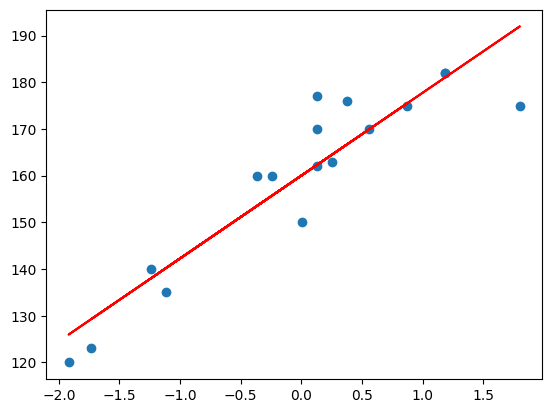

In [62]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color = 'red')

In [64]:
# prediction test data
y_pred_test = model.predict(X_test)

In [65]:
y_pred_test

array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
       172.15362118, 131.49070775])

In [66]:
y_pred_test, y_test

(array([125.99571945, 147.97567266, 142.48068436, 186.44059077,
        172.15362118, 131.49070775]),
 20    129
 17    159
 3     145
 13    183
 19    167
 16    140
 Name: Height, dtype: int64)

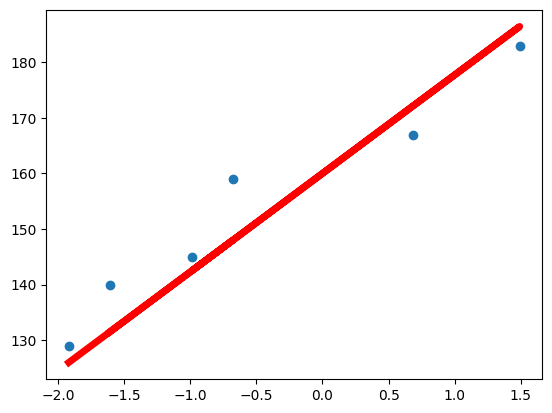

In [67]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, color = 'red', linewidth = 5)

In [70]:
# Performence metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [85]:
mae = mean_absolute_error(y_test, y_pred_test)

In [86]:
mse = mean_squared_error(y_test, y_pred_test)

In [87]:
rsq = r2_score(y_test, y_pred_test) # rsquare = 1-SSR/SST

In [78]:
# adjusted rsquare
# adjusted R2 = [1-(1-rsquare)*n-1/n-k-1]
# n is no. of observation
# k i sno. of predictor variable

In [88]:
X_test.shape[1]

1

In [89]:
X_test.shape[0]

6

In [90]:
arsq = 1-(1-rsq) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

In [91]:
rmse = root_mean_squared_error(y_test, y_pred_test)

In [92]:
# adjusted rsquare should be lesser than rsquare

In [94]:
print("The mean absolute error is ", mae)
print("The mean squared error is ", mse)
print("The root mean squared error is ", rmse)
print("The rsquare is ", rsq)
print("The adjusted rsquare is ", arsq)

The mean absolute error is  5.608571289304838
The mean squared error is  41.285662830455514
The root mean squared error is  6.425392037102134
The rsquare is  0.8721036174256606
The adjusted rsquare is  0.8401295217820757


In [95]:
# assumptions
# X-y should have linear relationship
# Observation should have no relation
# Errors should have constant variation
# Error should be normally distributed
# Features among themselve should be least related

In [97]:
# Let's make a plot between y_test
# to understand that Errors should have constant variation
# Error should be normally distributed

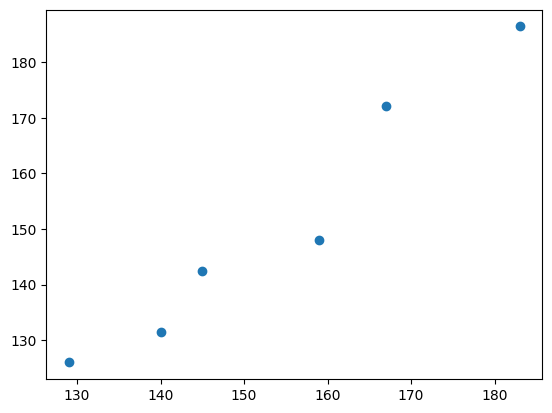

In [99]:
plt.scatter(y_test, y_pred_test)
# to check if y_test and its prediction aligns

In [101]:
error = y_test-y_pred_test
error

,Height
20,3.004281
17,11.024327
3,2.519316
13,-3.440591
19,-5.153621
16,8.509292


<ipython-input-102-3bd4b80a5a37>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


<Axes: xlabel='Height', ylabel='Density'>

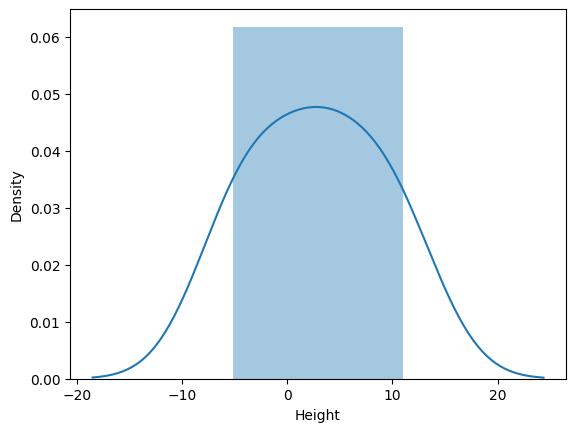

In [102]:
import seaborn as sns
sns.distplot(error)

In [103]:
# We can see that it is approxiamately normally distributed
# we can say that model is fairly valid

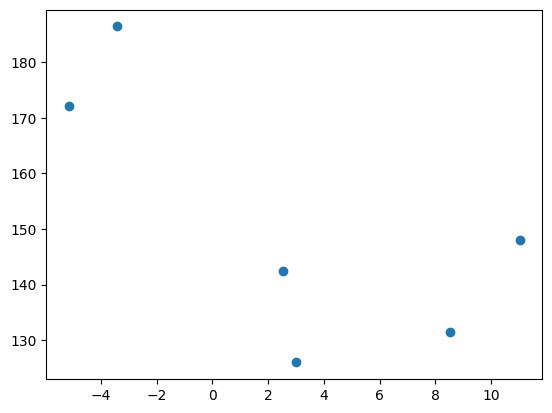

In [104]:
# to check constant variance
plt.scatter(error, y_pred_test)